In [23]:
# Import dependencies
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from ipywidgets import interact

## Support Vector Machines

Support Vector Machines (SVMs) is a powerful supervised learning algorithm used for both classification and regression. In supervised learning we have a dataset consisting of both features and labels. In this case information about students and a label saying if a student passed or not. Our goal is to make an estimator that can tell us if a student will pass or not based on the information we have about that student.

SVMs are a discriminative classifier which means that they attempt to draw a line that will separate the students that passed from those who did not pass. However, there are many lines to choose, but we want to choose the best line. This illustrate what i mean, consider the following example. Try to imagine that the purple dots are the students that passed and the red dots are the student that did not pass. 

* **Example 1**: In example one we see a line that does not separate the two groups of students particularly well. If we use this line our estimator will tell us that the student illustrated by the red cross will most likely not graduate. However, you can clearly see that the student is more similar to the students that passed than the ones who didn't.
* **Example 2**: Here we see that opposite as in example 1 where we draw a line that most likely give the wrong prediction for the student illustrated by the purple cross.
* **Example 3**: Here we have a line that better separates the two groups of students.

The point i want to make is that an SVM will select the line that SVMs tries to find the boundary that maximises the margin or distance to both groups of students. 

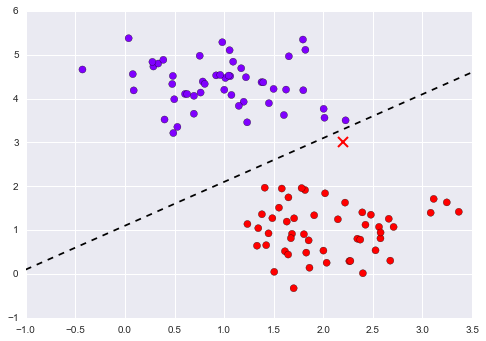

In [49]:
from sklearn.datasets.samples_generator import make_blobs

# Generate isotropic Gaussian blobs for clustering
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.55)

# Our endpoints
xfit = np.linspace(-1, 3.5)

# Interactive SVM demo
def best_line(example=1):
    # Plot the datasets
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    # Limit the x-axis
    plt.xlim(-1, 3.5);
    if example == 1:
        plt.plot(xfit, 1.0 * xfit + 1.1, 'k--')
        plt.plot([2.2], [3.0], 'x', color='red', markeredgewidth=2, markersize=10)
    elif example == 2:
        plt.plot(xfit, -0.3 * xfit + 2.8, 'k--')
        plt.plot([3.0], [2.2], 'x', color='purple', markeredgewidth=2, markersize=10)
    else:
        plt.plot(xfit, 0.25 * xfit + 2.3, 'k--')

interact(best_line, example=[1,3]);

**Protip**: Drag the example slider to show the different examples

Lets take a closer look at the line the SVM will choose to separate our passing and non-passing students.

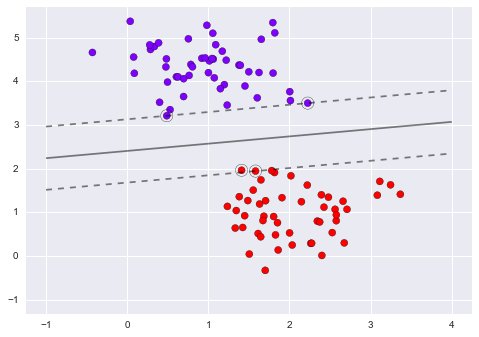

In [89]:
from sklearn.svm import SVC

# Plot a SVM decision function
def plot_decision_function(clf):
    ax = plt.gca()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', zorder=10)
    x = np.linspace(-1, 4, 30)
    y = np.linspace(-1, 4, 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(-1, 2))
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], 
               alpha=0.5, linestyles=['--', '-', '--'])
    
# Plot the datasets
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Initialize the SVM classifier
clf = SVC(kernel='linear')
 
# Fit the SVM classifier
clf.fit(X.reshape(-1, 2), y)

# Plot SVM decision boundary
plot_decision_function(clf);

Another interesting aspect of SVMs is that not all points are **equally important**. It is only the points supporting the model (**the support vectors**) that has a impact on how the line will look.. Now that we have found the line that maximizes the margin we can make more confident prediction about which students will pass, and who won't.